In [6]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import stft, get_window


def get_project_root():
    """Retorna o diretório raiz do projeto, subindo 1 ou 2 níveis dependendo do ambiente."""
    return Path(__file__).resolve().parents[1] if '__file__' in globals() else Path().resolve().parents[1]


def read_audio(audio_filename: str, data_path: Path):
    """Lê um arquivo de áudio e retorna (fs, x, t)."""
    audio_path = data_path / audio_filename
    fs, x = wavfile.read(audio_path)
    x = x.astype(float)
    t = np.arange(len(x)) / fs
    print(f"Arquivo: {audio_path.name} | x.shape = {x.shape}, fs = {fs}")
    return fs, x, t


def compute_stft(x, fs, winlen=441, overlap=220, window_name='blackmanharris'):
    """Computa a STFT e retorna (f, t_seg, mXst, pXst)."""
    window = get_window(window_name, winlen)
    f, t_seg, Zxx = stft(
        x, fs=fs,
        window=window,
        nperseg=winlen,
        noverlap=overlap,
        boundary=None,
        padded=False
    )
    mXst = 20 * np.log10(np.abs(Zxx) + 1e-12)
    pXst = np.angle(Zxx)
    print(f"STFT: Zxx.shape = {Zxx.shape}, mXst.shape = {mXst.shape}, pXst.shape = {pXst.shape}")
    return f, t_seg, mXst, pXst


def plot_audio_and_spectrogram(t, x, f, t_seg, mXst, title_prefix=''):
    """Plota o sinal de áudio e o espectrograma."""
    plt.figure(figsize=(13, 15))

    # Sinal de áudio
    plt.subplot(211)
    plt.plot(t, x)
    plt.xlim([t[0], t[-1]])
    plt.grid()
    plt.title(f'{title_prefix}Original Audio: x(t)')
    plt.ylabel('Amplitude (μV)')

    # Espectrograma
    plt.subplot(212)
    extent = [t_seg[0], t_seg[-1], f[0], f[-1]]
    plt.imshow(mXst, aspect='auto', origin='lower', cmap='jet', extent=extent, vmin=15)
    plt.colorbar(orientation='horizontal', label='Intensidade (dB)')
    plt.title(f'{title_prefix}Spectrogram of x(t)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

    plt.tight_layout()
    plt.show()


# Plot do sinal do Zebra Finch

Arquivo: zebrafinch_1.wav | x.shape = (142784,), fs = 22050
STFT: Zxx.shape = (221, 645), mXst.shape = (221, 645), pXst.shape = (221, 645)


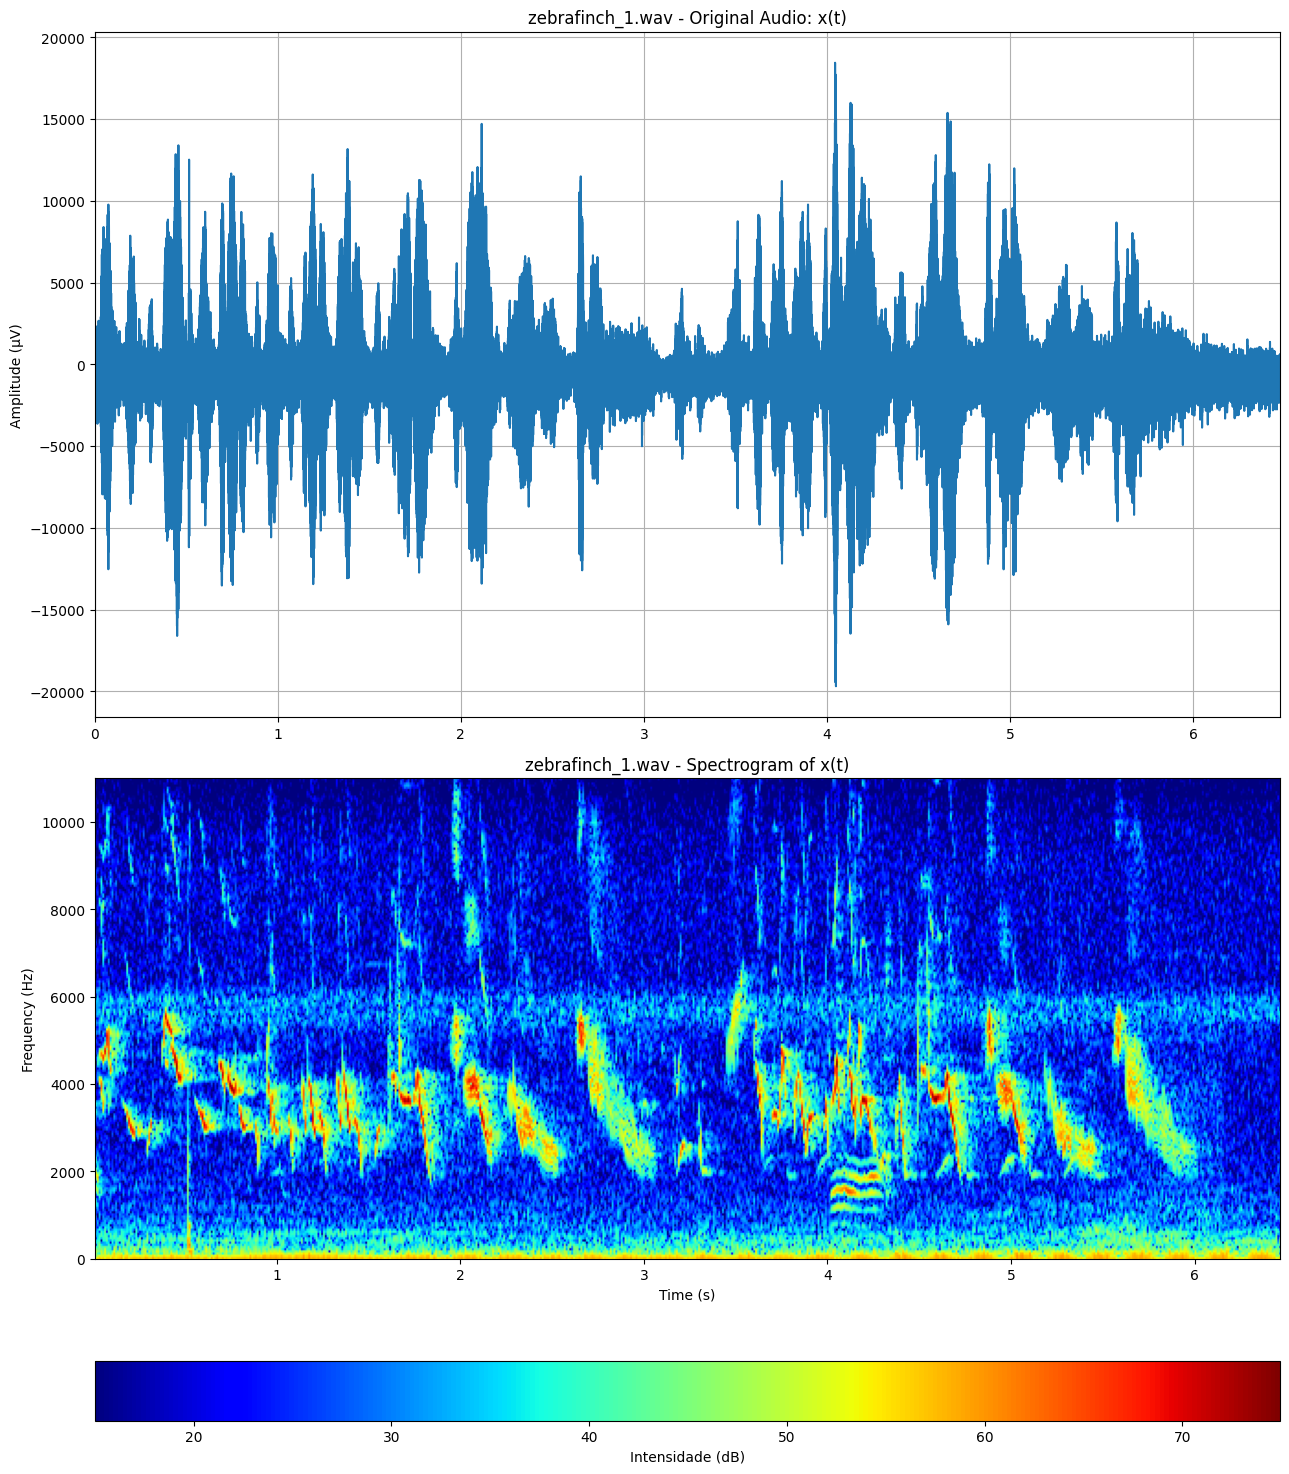

In [7]:
ROOT_DIR = get_project_root()
DATA_PATH = ROOT_DIR / 'data'
audio_file = 'zebrafinch_1.wav'
# Nome do arquivo de áudio
fs, x, t = read_audio(audio_file, DATA_PATH)
f, t_seg, mXst, pXst = compute_stft(x, fs)
plot_audio_and_spectrogram(t, x, f, t_seg, mXst, title_prefix=f'{audio_file} - ')

# Plot do Bengalese Finch

Arquivo: llb11_00147_2018_05_04_09_16_42.wav | x.shape = (232293,), fs = 44100
STFT: Zxx.shape = (221, 1050), mXst.shape = (221, 1050), pXst.shape = (221, 1050)


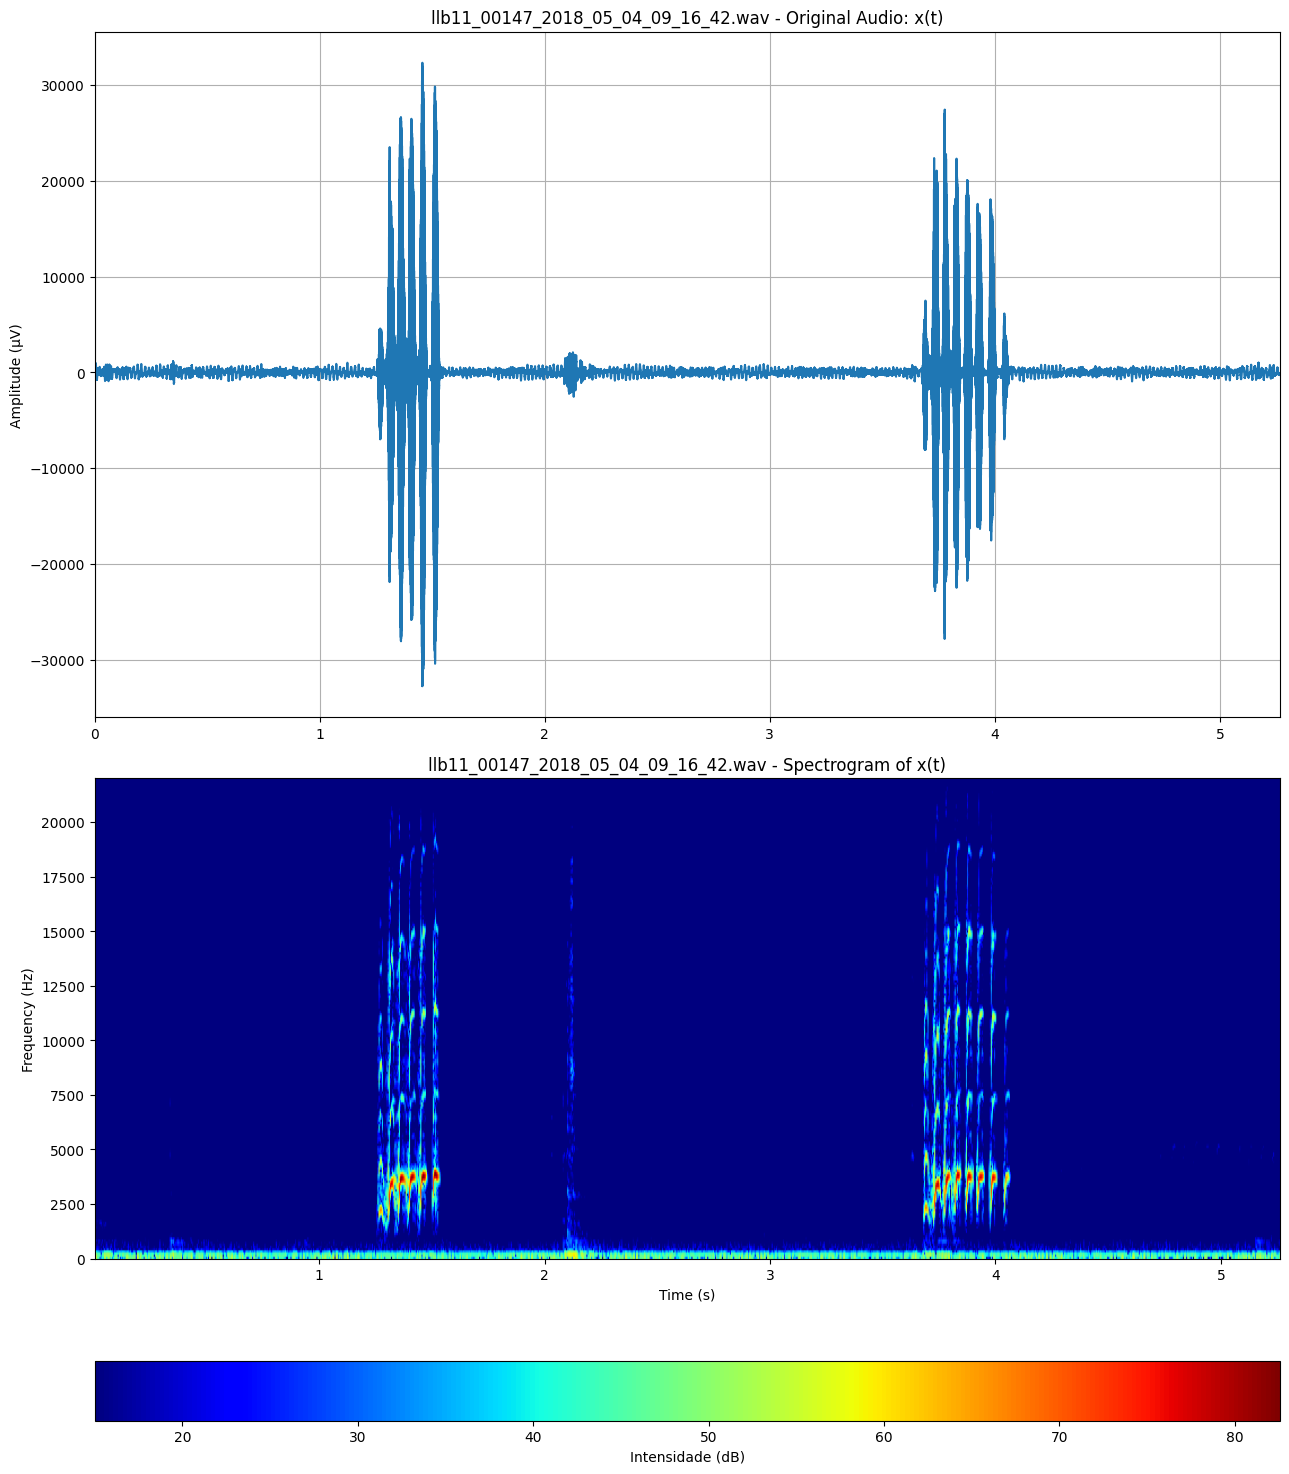

In [8]:
ROOT_DIR = get_project_root()
DATA_PATH = ROOT_DIR / 'data'
audio_file = 'llb11_00147_2018_05_04_09_16_42.wav'
# Nome do arquivo de áudio
fs, x, t = read_audio(audio_file, DATA_PATH)
f, t_seg, mXst, pXst = compute_stft(x, fs)
plot_audio_and_spectrogram(t, x, f, t_seg, mXst, title_prefix=f'{audio_file} - ')


# Plot do P14

Arquivo: F1N1-F1C-P14_part1.wav | x.shape = (3125000,), fs = 250000
STFT: Zxx.shape = (221, 14139), mXst.shape = (221, 14139), pXst.shape = (221, 14139)


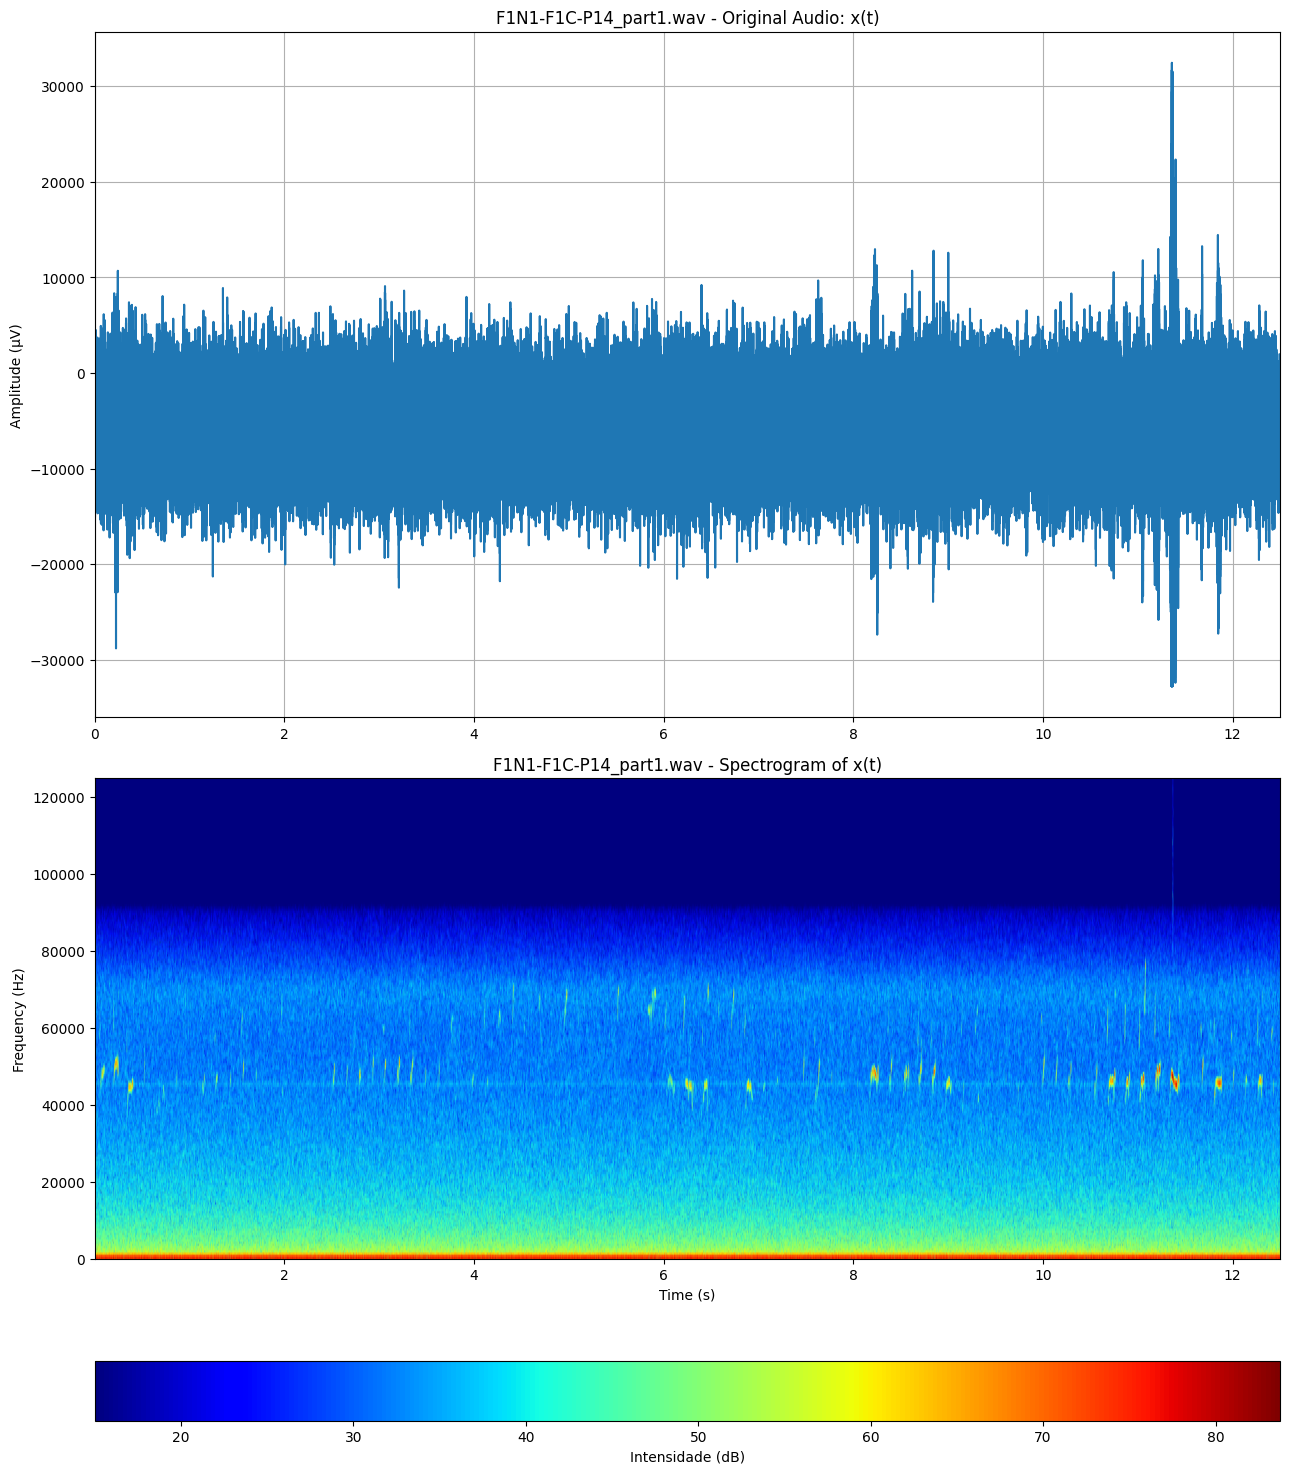

In [9]:
ROOT_DIR = get_project_root()
DATA_PATH = ROOT_DIR / 'data'
audio_file = 'F1N1-F1C-P14_part1.wav'
# Nome do arquivo de áudio
fs, x, t = read_audio(audio_file, DATA_PATH)
f, t_seg, mXst, pXst = compute_stft(x, fs)
plot_audio_and_spectrogram(t, x, f, t_seg, mXst, title_prefix=f'{audio_file} - ')
